# RR_LYRAE Dataset Analysis and Efficiency of Various Algorithms on The Given Data

these are import statements to import libraries for python and for the command to import linear Discriminator there is an alternative code too from sklearn.lda import LDA this works in latest version through my notebook is running an older version so the old version of the code is being used sk
-------------------------------------------------------------------------------------------------------------------
                                    A brief about RR_Lyrae Stars
RR Lyrae variables are periodic variable stars, commonly found in globular clusters and are used as standard candles to measure (extra)galactic distances.
RR Lyraes are pulsating horizontal branch ageing stars of spectral class A or F, with a mass of around half the Sun's. They are thought to have previously shed mass during the Red-giant branch phase, and consequently, they were once stars with similar or slightly less mass than the Sun, around 0.8 solar masses.
-------------------------------------------------------------------------------------------------------------------
                                          Algorithms used 
1. Decision Tree
2. SVM
3. Linear Discriminator
4. K-Neighbours
5. Logistic Regression

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import completeness_contamination
from astroML.utils import split_samples
from astroML.plotting import setup_text_plots

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score




Let's define the text properties.

In [3]:
setup_text_plots(fontsize=8, usetex=True)

We import and split data into test and train.Whenever we use an ML module we divide the data into two sets so that we can train the module and then get the prediction efficiency. also, we are converting the data into two pandas dataframe this will allow proper data manipulation later in the notebook.This library make the data visualization better

In [4]:
X, y = fetch_rrlyrae_combined()
xd = pd.DataFrame(data=X)
yd = pd.DataFrame(data=y)
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25], random_state=1)

In [5]:
clf = DecisionTreeClassifier(random_state=1, criterion='entropy')

We fit our data to train the decision tree there are two data sets we have made x_train and y_train 
we have the variable in x and we need to generate output in form of y. 
basically we have x as inputs and we need to predict the value of the y (1,0) ie rr_lyare or not.

In [6]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

We generate a prediction score

In [7]:
y_out = clf.predict(X_test)
clf.predict_proba(X_test, check_input=True)

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

we genrate average accuracy score

In [8]:
clf.score(X_test,y_test)

0.99484668899768103

we have the accuracy score that defines how well algorithm can predict the data values also
we see how many mistakes have been made by the algorithm

In [9]:
tot_neg = np.sum(y_test == 0)
tot_pos = np.sum(y_test == 1)

fn = np.sum((y_test == 1) & (y_out == 0))
tn = np.sum((y_test == 0) & (y_out == 0))

fp = np.sum((y_test == 0) & (y_out == 1))
tp = np.sum((y_test == 1) & (y_out == 1))

print( "----------------------------------------------------------------")
print ("partial training set: (%i non-variable, %i RR Lyrae)"
       % (np.sum(y_train == 0), np.sum(y_train == 1)))
print( "positive = RR Lyrae, negative = non-variable")
print ("false positives: %i (%.1f%%)" % (fp, fp * 100. / (fp + tp)))
print ("false negatives: %i (%.1f%%)" % (fn, fn * 100. / (fn + tn)))


----------------------------------------------------------------
partial training set: (69499 non-variable, 356 RR Lyrae)
positive = RR Lyrae, negative = non-variable
false positives: 65 (47.4%)
false negatives: 55 (0.2%)


we genrate a SVM and also we have done crossvalidation the accuracy is good

In [10]:
clf =SVC(random_state=1)
clf.fit(X_train, y_train) 
clf.score(X_test,y_test)

0.99454607918921245

In [11]:
print(clf.predict(X_test))

[ 0.  0.  0. ...,  0.  0.  0.]


In [12]:
#scores = cross_val_score(clf,xd,yd, cv=5)
#print(scores)

scatter plot of the data this shows that which ones are stars and rr_lyrae stars in which frequency and time domain.
Matplotlib is used here and full data is utilized

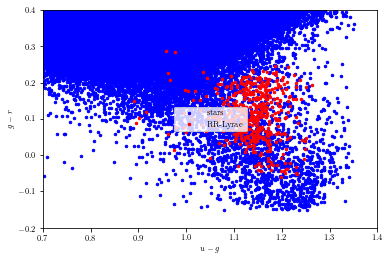

In [13]:
stars = (y == 0)
rrlyrae = (y == 1)
ax = plt.axes()

ax.plot(X[stars, 0], X[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(X[rrlyrae, 0], X[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')

ax.legend(loc=10)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.set_xlim(0.7, 1.4)
ax.set_ylim(-0.2, 0.4)

plt.show()




this shows the plot via seaborn we have various subplots explaining the distribution of various frequency and time domains that define a star in multiple distributions.for the type of RR_lyre and a normal star
0 star
1,2,3 Types of RR_Lyrae

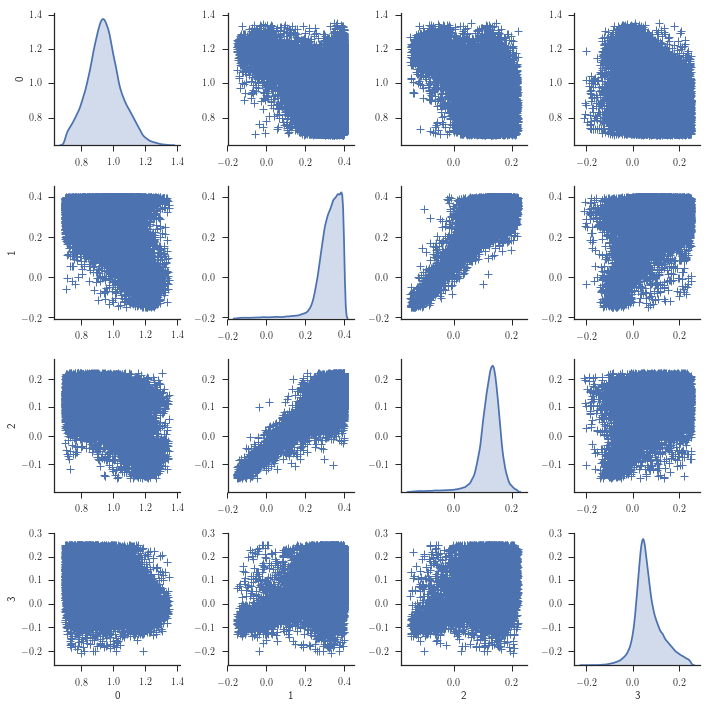

In [14]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(xd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
plt.show()

this shows the density of type of stars in particular range there are supposed to be dots but due to large number of data points they look like bars but all of them have specific zones

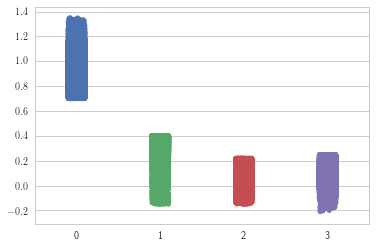

In [15]:
sns.set(style="whitegrid", color_codes=True)
sns.stripplot( data=xd, jitter=True)
plt.show()

this plot shows the distrubution of data in y this shows which catagoery the star is this is not much helpful but this is integeral part of the system

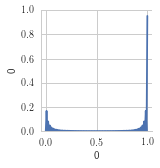

In [16]:
sns.pairplot(yd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
plt.show()

we can see the data in the tabular format 

In [17]:
print(xd)

              0         1         2         3
0      1.250999  0.394000  0.137000  0.061999
1      1.048000  0.339001  0.151999  0.023001
2      1.008001  0.341999  0.129000  0.203001
3      0.965000  0.392000  0.149000  0.150000
4      1.040001  0.333000  0.125999  0.101999
5      1.154001  0.373999  0.145000  0.121000
6      0.965000  0.384001  0.118999  0.011000
7      1.015001  0.370998  0.158001  0.091999
8      1.003000  0.391001  0.145000  0.074999
9      0.948000  0.330000  0.164000  0.021000
10     1.020000  0.389999  0.168001  0.070999
11     0.997999  0.381001  0.143999  0.092001
12     0.882000  0.390999  0.130001  0.156000
13     0.851000  0.289000  0.106001  0.028999
14     0.985001  0.392000  0.147999  0.048000
15     0.914000  0.329000  0.142000  0.077000
16     1.011999  0.339001  0.166000  0.101999
17     0.864000  0.372000  0.176001  0.070000
18     1.035000  0.373001  0.191999  0.073999
19     1.008999  0.353001  0.184000 -0.060001
20     0.955000  0.393000  0.10400

In [18]:
print(yd)

         0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
...    ...
93111  1.0
93112  1.0
93113  1.0
93114  1.0
93115  1.0
93116  1.0
93117  1.0
93118  1.0
93119  1.0
93120  1.0
93121  1.0
93122  1.0
93123  1.0
93124  1.0
93125  1.0
93126  1.0
93127  1.0
93128  1.0
93129  1.0
93130  1.0
93131  1.0
93132  1.0
93133  1.0
93134  1.0
93135  1.0
93136  1.0
93137  1.0
93138  1.0
93139  1.0
93140  1.0

[93141 rows x 1 columns]


here we are defining other algorithms like the previous SVM but we will be trying regression to linear one the kernel used in SVM was linear and the regression is logistics.
then we have other classification algorithms our goal as mentioned above will be to plot curves to see which one is most suitable fo the data.
a hint the Logistic regression doesn't support class weights as auto if you try out dict else it will be none but the balanced setting should be used to avoid any bias towards any classes.

In [19]:
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        print (classifier.__name__)
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]

        names.append(classifier.__name__)
        probs.append(y_probs)

    return names, probs

names, probs = compute_models(
                              (LDA, {}),
                              
                              (LogisticRegression,
                               dict(class_weight='balanced')),
                              (KNeighborsClassifier,
                               dict(n_neighbors=10)),
                              (DecisionTreeClassifier,
                               dict(random_state=0, max_depth=12,
                                    criterion='entropy')),
                             )


LinearDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier


finally, this segment will test different algo's efficiency and see the ROC curve to decide which one is most suitable.
Custom Labels for the algorithms are defined please check underlying code for full form the abbreviations used

In [20]:
fig = plt.figure(figsize=(12, 8.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)

labels = dict(LinearDiscriminantAnalysis='LDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              LogisticRegression='LR')



the slopes of the KNN and DT are quite good and fits the criterion for a good algorithm thus we can say that these two are good ones. the curves for LR and LDA are quite steep.The neural network may have higher performance but the time taken will be a negative factor

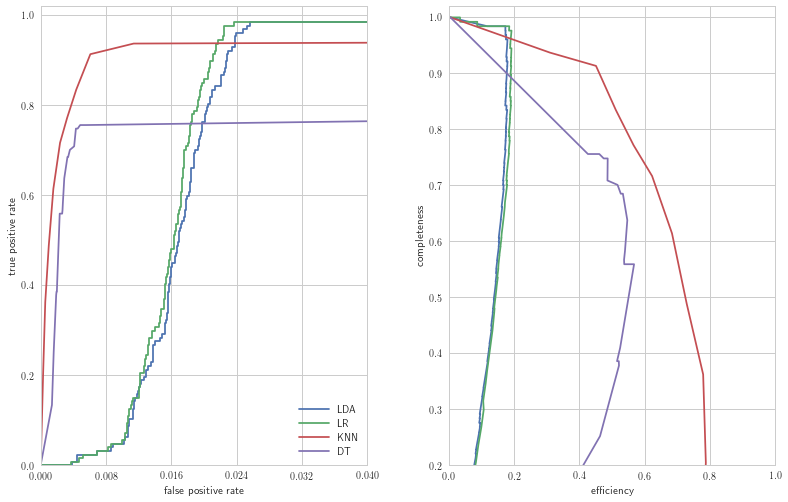

In [21]:
thresholds = np.linspace(0, 1, 1001)[:-1]

# iterate through and show results
for name, y_prob in zip(names, probs):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name])

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.02)

plt.show()